In [1]:
%matplotlib inline

import h5py
import numpy as np
from matplotlib import pyplot as plt
from data import transforms as T
import torch

In [2]:
%pwd

'/Users/yg/code/github/fastMRI'

In [3]:
def visualize_reconstruction(volume_kspace, slice_index):
    slice_kspace = volume_kspace[slice_index]
    slice_image = T.to_tensor(slice_kspace)
    imgplot = plt.imshow(slice_image, cmap="gray")
    plt.show()

In [4]:
reconst_file = "experiments/april11/reconstructions/file1000513_v2.h5"
reconst_hf = h5py.File(reconst_file)

In [5]:
# print('Keys:', list(reconst_hf.keys()))
#print('Attrs:', dict(reconst_hf.attrs))

(16, 320, 320)


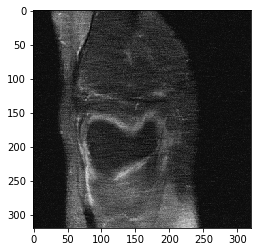

In [34]:
reconst_volume_kspace = reconst_hf['reconstruction'][()]
print(reconst_volume_kspace.shape)
visualize_reconstruction(reconst_volume_kspace, 2)

In [11]:
def visualize_test(volume_kspace, slice_index):
    slice_kspace = volume_kspace[slice_index]
    slice_kspace = T.to_tensor(slice_kspace)
    slice_image = T.ifft2(slice_kspace)           # Apply Inverse Fourier Transform to get the complex image
    slice_image_abs = T.complex_abs(slice_image)
    imgplot = plt.imshow(slice_image_abs, cmap="gray")
    plt.show()

In [12]:
test_file = "/Users/yg/code/github/fastMRI/data/singlecoil_test/singlecoil_test/file1000513_v2.h5"
test_hf = h5py.File(test_file)
# print('Keys:', list(test_hf.keys()))
# print('Attrs:', dict(test_hf.attrs))

(33, 640, 372)


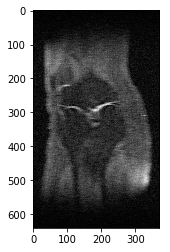

In [40]:
test_volume_kspace = test_hf['kspace'][()]
print(test_volume_kspace.shape)
visualize_test(test_volume_kspace, 21)